Saving Frozen Rose.jpg to Frozen Rose.jpg


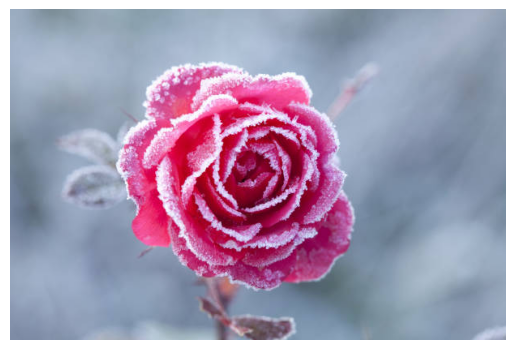

In [ ]:
from google.colab import files
import cv2
import numpy as np
import io
import matplotlib.pyplot as plt

uploaded = files.upload()

image_path = next(iter(uploaded))
image_bytes = uploaded[image_path]
image_array = np.frombuffer(image_bytes, dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

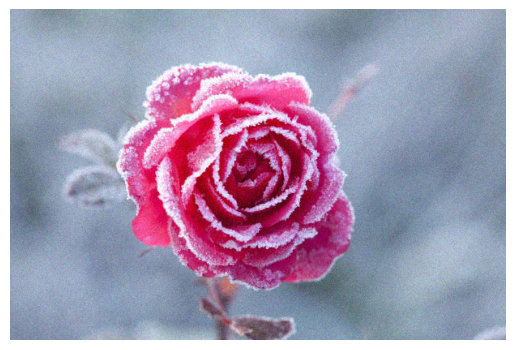

In [ ]:
image = np.float32(image) / 255.0

mean = 0
std_dev = 0.2

noise = np.random.normal(mean, std_dev, image.shape).astype("float32")

noisy_image = image + 0.2 * noise

noisy_image = np.clip(noisy_image, 0, 1)

noisy_image = np.uint8(noisy_image * 255)

plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

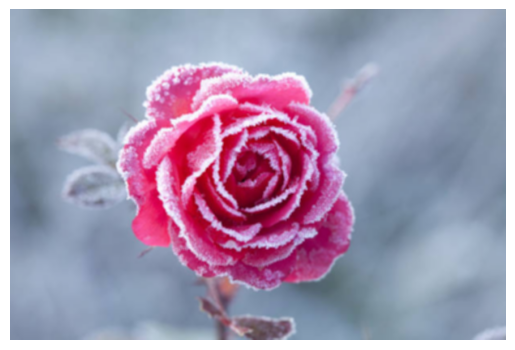

In [ ]:
kernel = np.ones((3, 3), np.float32) / 9

filtered_image = cv2.filter2D(image, -1, kernel)

filtered_image = np.uint8(filtered_image * 255)

plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

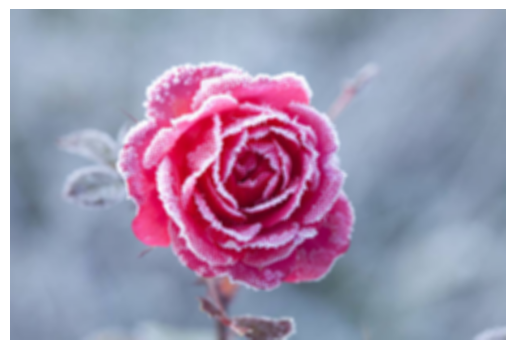

In [ ]:
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)


filtered_image2 = cv2.filter2D(image, -1, kernel)

filtered_image2 = np.uint8(filtered_image2 * 255)

plt.imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

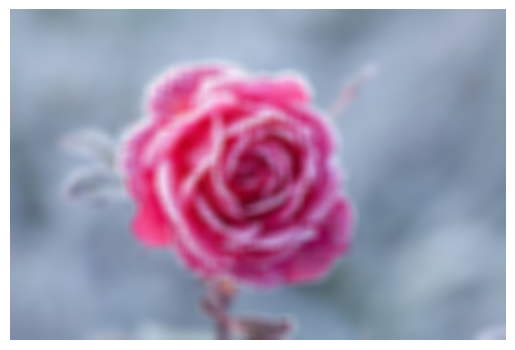

In [ ]:
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)


filtered_image3 = cv2.filter2D(image, -1, kernel)

filtered_image3 = np.uint8(filtered_image3 * 255)

plt.imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
from math import log10
def psnr(image1, image2):
  mse=np.mean((image1-image2)**2)
  if mse == 0:
    return float('inf')

  max_pixel = 255.0
  psnr= 20 * log10(max_pixel/np.sqrt(mse))
  return psnr

In [ ]:
psnr_value1 = psnr(image, noisy_image)
print('PSNR between original and noisy image:', psnr_value1, 'dB')

psnr_value2 = psnr(image, filtered_image)
print('PSNR between original image and 3x3 filtered image:', psnr_value2, 'dB')

psnr_value3 = psnr(image, filtered_image2)
print('PSNR between original image and 5x5 filtered image:', psnr_value3, 'dB')


psnr_value4 = psnr(image, filtered_image3)
print('PSNR between original image and 15x15 filtered image:', psnr_value4, 'dB')

PSNR between original and noisy image: 3.986738922890716 dB
PSNR between original image and 3x3 filtered image: 4.012842023100642 dB
PSNR between original image and 5x5 filtered image: 4.0298571120467646 dB
PSNR between original image and 15x15 filtered image: 4.0845296403775375 dB
